<a href="https://colab.research.google.com/github/Manali1608/NetflixProject/blob/main/NetflixProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
netflix = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/netflix_titles.csv')
display(netflix.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Checking for NULL values
display(netflix.isna().any())
display(netflix[netflix.columns[netflix.isna().any()]])
# number of records in each column with missing values
netflix.isna().sum()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool

,director,cast,country,date_added,rating,duration
0,Kirsten Johnson,NaN,United States,"September 25, 2021",PG-13,90 min
1,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",TV-MA,2 Seasons
2,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",TV-MA,1 Season
3,NaN,NaN,NaN,"September 24, 2021",TV-MA,1 Season
4,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",TV-MA,2 Seasons
...,...,...,...,...,...,...
8802,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",R,158 min
8803,NaN,NaN,NaN,"July 1, 2019",TV-Y7,2 Seasons
8804,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",R,88 min
8805,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",PG,88 min


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
#replacing null values
# We avoid dropping rows for director, cast and country as it will lead to excessive loss of info
# We decided to drop dateadded, rating and duration since the no of rows is less
netflix.shape
netflix.director.fillna("Director Unknown", inplace=True)
netflix.cast.fillna("Cast Unknown", inplace=True)
netflix.country.fillna("Country Unknown", inplace=True)
netflix.dropna(subset=["date_added", "rating","duration"], inplace=True)
netflix.shape


(8790, 12)

In [ ]:
# no more null values
display(netflix.isna().any())
netflix.isna().sum()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
# Changing column names to more meaningful names
display(netflix.columns)
netflix.rename(columns = {"listed_in":"genres"},inplace= True)
netflix.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description'],
      dtype='object')

In [ ]:
# Checking if any duplicate values are present
netflix.duplicated().sum()

0

In [ ]:
# convert the 'Date' column to datetime format
netflix.info()
netflix['date_added'] = netflix['date_added'].astype('datetime64[ns]')
 
# Check the format of 'Date' column
#df.info()
display(netflix.date_added)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  genres        8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8790, dtype: datetime64[ns]

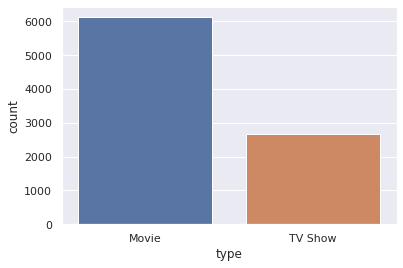

In [ ]:
#visualization on the dataset
# counting number of movies and tv shows
sns.countplot(x = 'type',data = netflix)
# There are more movies in netflix than tv shows

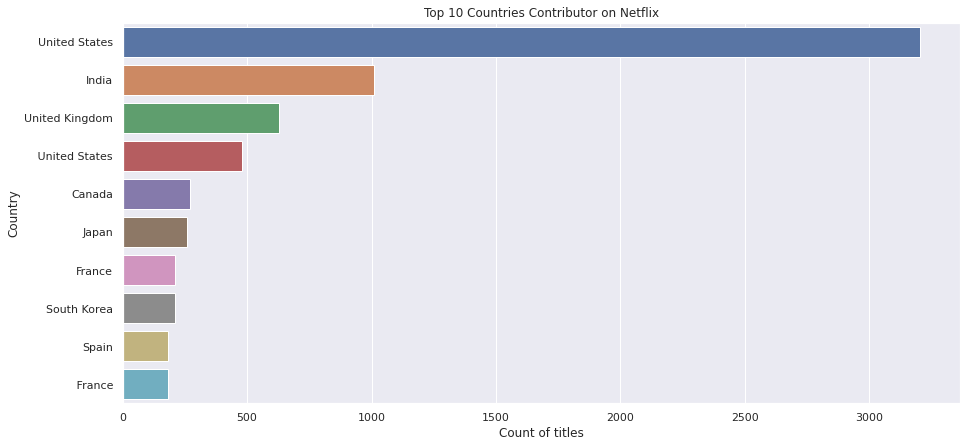

In [ ]:
# Setting the index as title
content_by_countries = netflix.set_index('title')
# Splitting the columns having multiple country name
content_by_countries= content_by_countries.country.str.split(',', expand=True)
# Stack converts into a dataframe
content_by_countries= content_by_countries.stack()
# Removing unknown countries from our consideration
content_by_countries_filtered=content_by_countries[content_by_countries != 'Country Unknown']
plt.figure(figsize=(15,7))
sns.countplot(y = content_by_countries_filtered,order=content_by_countries_filtered.value_counts().index[:10])

plt.title('Top 10 Countries Contributor on Netflix')
plt.xlabel('Count of titles')
plt.ylabel('Country')
plt.show()
# Analysis: Maximum contents are from United States, India and UK


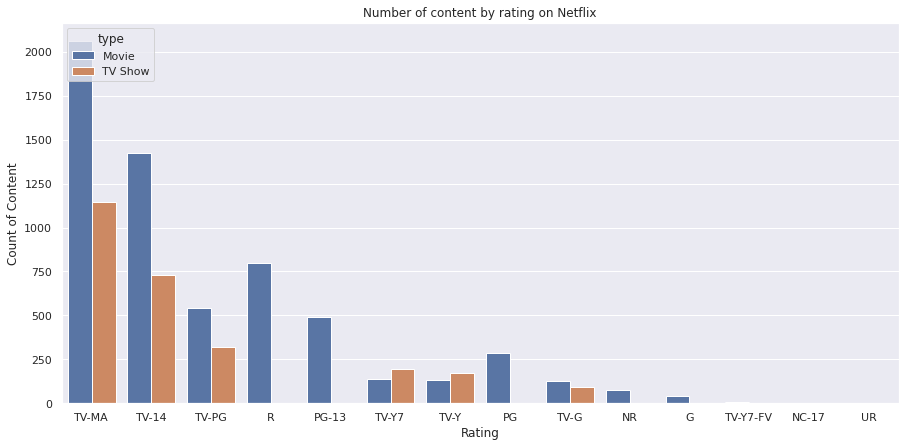

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x = 'rating',data=netflix,order=netflix['rating'].value_counts().index[:15],hue='type')
plt.title('Number of content by rating on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count of Content')
plt.show()
# Maximum content for both movie and TV shows are made for mature audience only


Text(0, 0.5, 'NumberofSeasons')

<Figure size 1440x720 with 0 Axes>

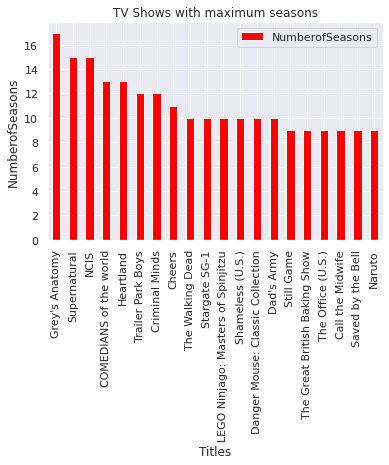

In [ ]:
#Excluding movies from the dataset
tv_shows_maxseasons=netflix.loc[netflix['type']=='TV Show',:]

# Removing Seasons/Season from duration column

filtered_shows =tv_shows_maxseasons.set_index('title').duration.str.split(' ',expand=True)
filtered_shows=filtered_shows.iloc[:,0]
filtered_shows= filtered_shows.reset_index()

# Renaming column
filtered_shows.rename( columns={0:'NumberofSeasons'}, inplace=True)

#converting Numberofseasons column to integer
filtered_shows['NumberofSeasons']=filtered_shows['NumberofSeasons'].astype(str).astype(int)

#Sorting on descending order
filtered_shows= filtered_shows.sort_values(by=['NumberofSeasons'],ascending=False)

#Select top 20 tv shows with maximum seasons
highestseasons= filtered_shows[:20]

#Plotting
plt.figure(figsize=(20,10))
highestseasons.plot(kind='bar',x='title',y='NumberofSeasons',color='red')
plt.title('TV Shows with maximum seasons')
plt.xlabel('Titles')
plt.ylabel('NumberofSeasons')



In [ ]:
# Movie and TV Shows by release year
import plotly.express as px
plt.figure(figsize = (10, 6))
fig = px.histogram(netflix, x = netflix["release_year"])
fig.update_traces(xbins_size=0.5, selector=dict(type='histogram'))
fig.show()



<Figure size 720x432 with 0 Axes>

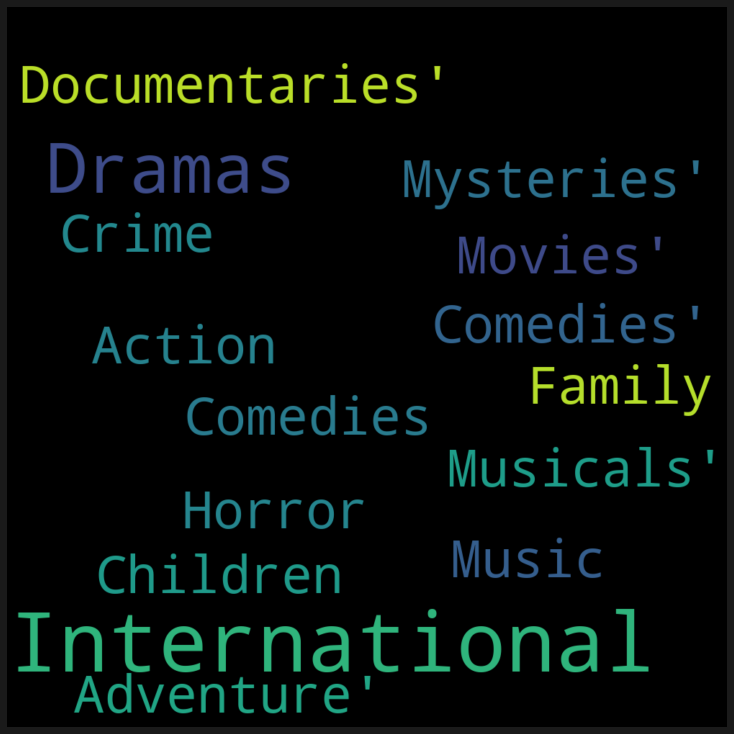

In [ ]:
#word cloud for most number of genre in Netflix
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
stop_words = ["TV","Shows","Movies"] + list(STOPWORDS)
text = netflix.genres.values
wordcloud = WordCloud(
    width = 1000,
    height = 1000,
    background_color = 'black',
    stopwords = stop_words).generate(str(text))
fig = plt.figure(
    figsize = (10, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

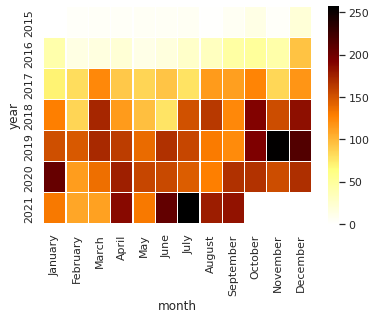

In [ ]:
# During which month maximum movies were released
pd.options.mode.chained_assignment = None

netflix_filtered=netflix.loc[netflix['date_added']>'2014-12-31',:]

netflix_filtered['year'] = netflix_filtered['date_added'].apply(lambda x : x.year)
netflix_filtered['month'] = netflix_filtered['date_added'].apply(lambda x : x.strftime("%B"))
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df = netflix_filtered.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order]
#display(df)
#plt.figure(figsize=(5, 5), dpi=200)
ax = sns.heatmap(df, xticklabels=df.columns, yticklabels=df.index, linewidths=.2, cmap="afmhot_r")




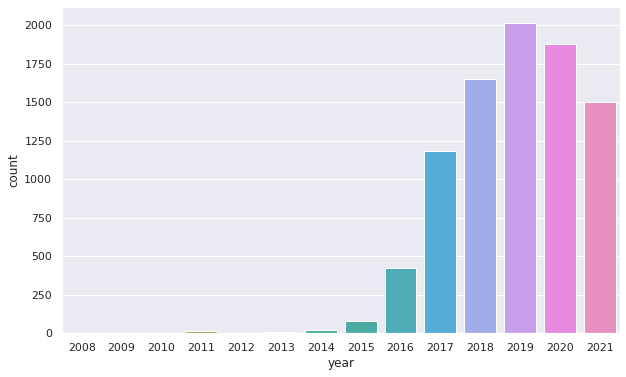

In [ ]:
#Netflix picked up speed from 2016
# Number of movies added each year
netflix['year'] = netflix['date_added'].apply(lambda x : x.year)
netflix['month'] = netflix['date_added'].apply(lambda x : x.strftime("%B"))
#display(netflix)
plt.figure(figsize = (10, 6))
sns.countplot(x = 'year',data = netflix)

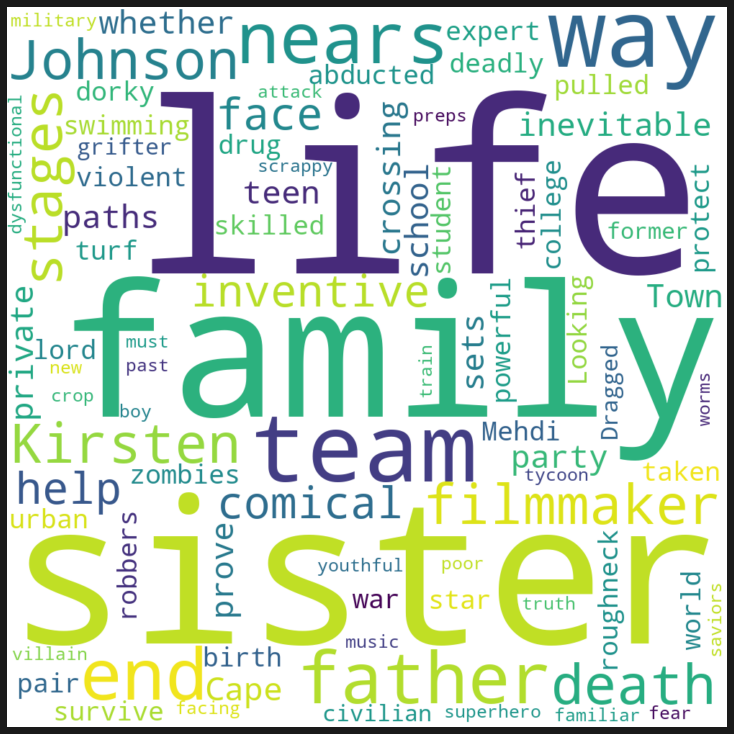

In [ ]:
#word cloud for description in Netflix
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
stop_words = list(STOPWORDS)
text = netflix.description.values
wordcloud = WordCloud(
    width = 1000,
    height = 1000,
    background_color = 'white',
    stopwords = stop_words).generate(str(text))
fig = plt.figure(
    figsize = (10, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

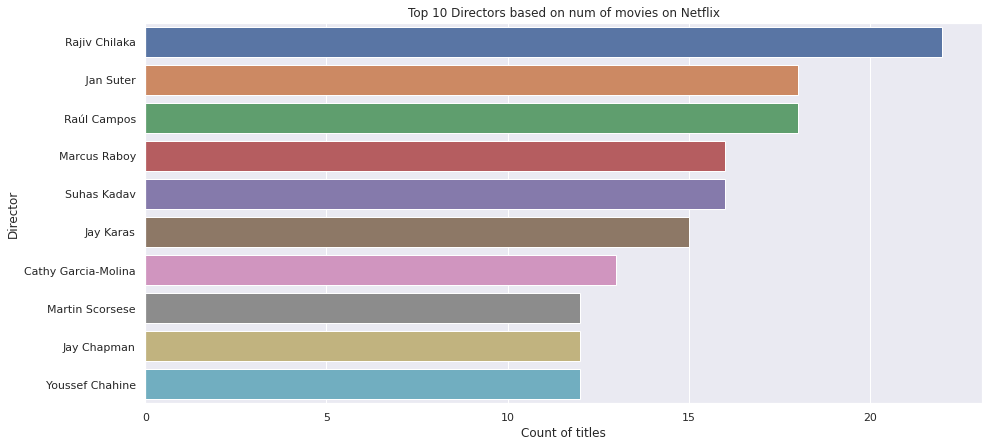

In [ ]:
#WORKING WITH DIRECTORS
# Setting the index as title
director_by_type = netflix.set_index('title')
# Splitting the columns having multiple director name
director_by_type= director_by_type.director.str.split(',', expand=True)
#display(director_by_type)
# Stack converts into a dataframe
director_by_type= director_by_type.stack()
#display(director_by_type)
# Removing unknown countries from our consideration
director_by_type=director_by_type[director_by_type != 'Director Unknown']
plt.figure(figsize=(15,7))
sns.countplot(y = director_by_type,order=director_by_type.value_counts().index[:10])

plt.title('Top 10 Directors based on num of movies on Netflix')
plt.xlabel('Count of titles')
plt.ylabel('Director')
plt.show()

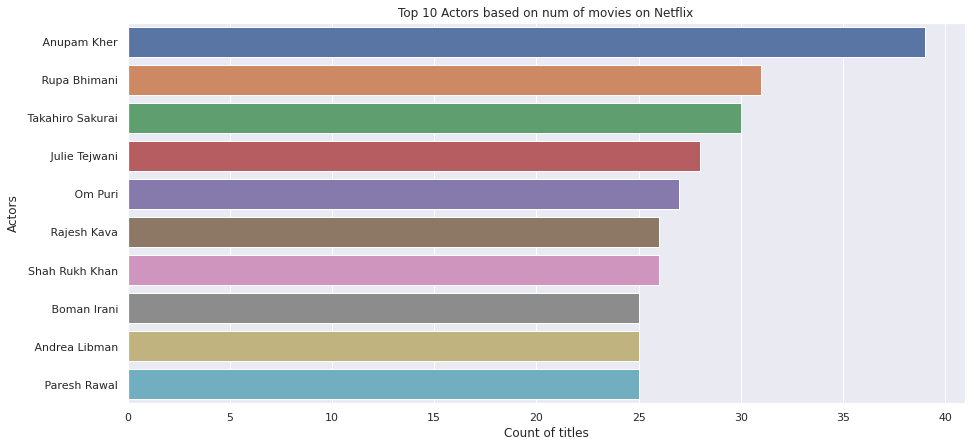

In [ ]:
# Working with CAST
# Setting the index as title
cast_by_type = netflix.set_index('title')
# Splitting the columns having multiple director name
cast_by_type= cast_by_type.cast.str.split(',', expand=True)
#display(director_by_type)
# Stack converts into a dataframe
cast_by_type= cast_by_type.stack()
#display(director_by_type)
# Removing unknown countries from our consideration
cast_by_type=cast_by_type[cast_by_type != 'Cast Unknown']
plt.figure(figsize=(15,7))
sns.countplot(y = cast_by_type,order=cast_by_type.value_counts().index[:10])

plt.title('Top 10 Actors based on num of movies on Netflix')
plt.xlabel('Count of titles')
plt.ylabel('Actors')
plt.show()